<a href="https://colab.research.google.com/github/nistrate/Statistics/blob/main/Math345_LAB_W8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1: Difference in sample proportions**

For this problem you will:
1.    Design a function that will take two proportions $\hat{p}_A$ and $\hat{p}_B$, the sample sizes $n_A$ and $n_B$, along with the population size $N_A$ and $N_B$. Your function needs to check if the standart deviation formula for $ \hat{p}_A - \hat{p}_B $ is appropriate to use. Given a positive answer on this check your function describe the distribution of $ \hat{p}_A - \hat{p}_B $ in terms of its *mean*, *standart deviation*, and *shape*.



> Before you code your function list (using words and formulas) all the conditions that will determine the independence of samples from each population and the conditions that will determine that the distripution of $\hat{p}_A- \hat{p}_B$ is Gaussian. 



2.   Once you have the function written, apply it to the following problem: 


> Suppose that $11\%$ of all cars produced by manifacturer $A$ have a ceratin defect and $8\%$ of all cars produced by manifacturer $B$ have this defect. Each month, a you, as a quality control manager takes separate random samples of $300$ of the $4500$ produced cars from each plant. You than consider the difference between the proportions of cars with the defect in each sample, i.e. $ \hat{p}_A - \hat{p}_B $. 
*   Describe the distribution of $ \hat{p}_A - \hat{p}_B $ in terms of its *mean*, *standart deviation*, and *shape*.
*   If the shape is Gaussian, plot the probability distribution functions with the computed quantities 








In [29]:
import numpy as np
import matplotlib.pyplot as plt


In [32]:
# Problem 1: Difference in sample proportions

def gaussian(x, mu, sigma):
    f_x = (1 / np.sqrt(2*np.pi*sigma*sigma) ) * np.exp( - (x - mu)*(x - mu) / (2*sigma*sigma) ) 
    return f_x

def diff_proportion(p_A, p_B, n_A, n_B, N_A, N_B):

    # checking the "10% condition" for independent samples
    p_treshold = 0.1 # 10% threshold 

    if n_A / N_A > p_treshold:
        print ("We cannot assume independence of samples from population A.")

        if n_B / N_B > p_treshold:
            print ("We cannot assume independence of samples from population B.")
        
        p_dif = None
        sigma_dif = None
        shape_dif = None

        return p_dif, sigma_dif, shape_dif

    elif n_A / N_A <= p_treshold and n_B / N_B <= p_treshold:
        p_dif = p_A - p_B
        sigma_dif = np.sqrt( (p_A*(1-p_A))/n_A  + (p_B*(1-p_B))/n_B )
        
        # shape condition
        shape_threshold = 10
        if n_A*p_A >= shape_threshold and n_A*(1-p_A) >= shape_threshold and n_B*p_B >= shape_threshold and n_B*p_B >= shape_threshold: # checking for 10 successes and 10 failures in both samples -> gaussian distribution
            shape_dif = 'Gaussian'

            plt.figure(figsize = (10,10))
            x_line = np.arange(p_dif - 4*sigma_dif, p_dif + 4*sigma_dif, 0.0001)
            plt.plot(x_line, gaussian(x_line, p_dif, sigma_dif), '-.', color = 'chocolate', linewidth = 4, label = '$\hat{p}_{A}-\hat{p}_{B}$')
            plt.legend()
            plt.title('Difference in Sample\nGaussian Distribution')
            plt.xlabel( 'x' )
            plt.ylabel( 'Difference in Sample' )

            plt.show()

        else:
            shape_dif = 'Not Gaussian'

    return p_dif, sigma_dif, shape_dif


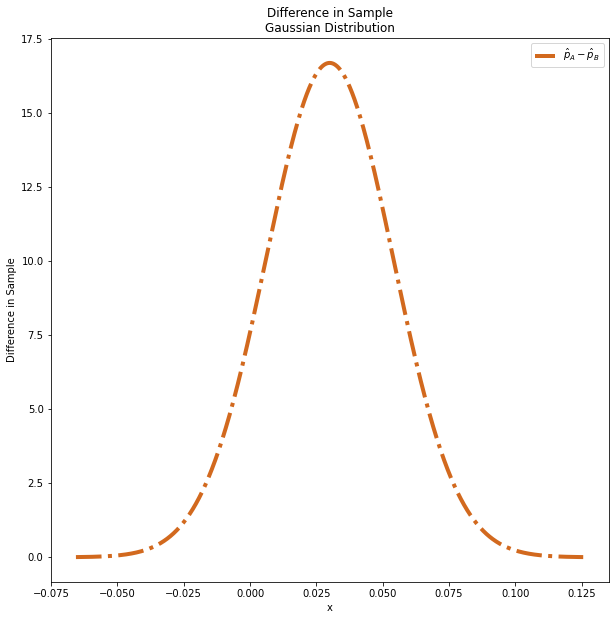

p_C = 0.03
sigma_C = 0.024
The shape of the difference distribution is Gaussian


In [34]:
p_C, sigma_C, shape = diff_proportion(p_A = 0.11, p_B = 0.08, n_A = 300, n_B = 300, N_A = 4500, N_B = 4500)

print(f"p_C = {np.round(p_C,3)}")
print(f"sigma_C = {np.round(sigma_C,3)}")
print(f"The shape of the difference distribution is {shape}")


In [22]:
200/3000

0.06666666666666667